Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]


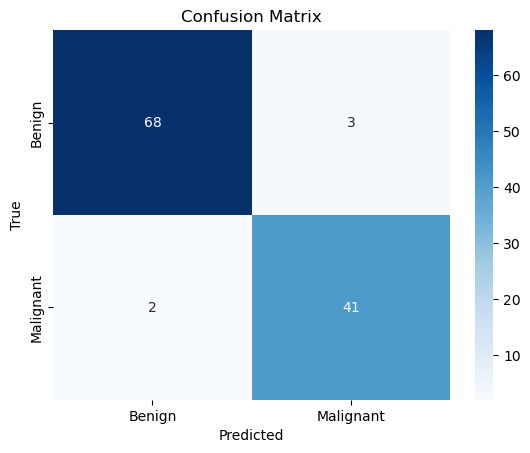

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset from CSV file
file_path = "/Users/nomagara/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.data"  
column_names = ["ID", "Diagnosis", "Mean_Radius", "Mean_Texture", "Mean_Perimeter", "Mean_Area",
                "Mean_Smoothness", "Mean_Compactness", "Mean_Concavity", "Mean_Concave_Points",
                "Mean_Symmetry", "Mean_Fractal_Dimension", "SE_Radius", "SE_Texture",
                "SE_Perimeter", "SE_Area", "SE_Smoothness", "SE_Compactness", "SE_Concavity",
                "SE_Concave_Points", "SE_Symmetry", "SE_Fractal_Dimension", "Worst_Radius",
                "Worst_Texture", "Worst_Perimeter", "Worst_Area", "Worst_Smoothness",
                "Worst_Compactness", "Worst_Concavity", "Worst_Concave_Points", "Worst_Symmetry",
                "Worst_Fractal_Dimension"]

df = pd.read_csv(file_path, header=None, names=column_names, index_col=0)

# Data preprocessing
X = df.iloc[:, 1:]
y = df['Diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
